In [ ]:
!pip install networkx matplotlib seaborn pandas


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile


zip_path = "/content/drive/My Drive/BIOGRID-ORGANISM-4.4.218.tab3.zip"
extract_path = "/content/drive/My Drive/BIOGRID-ORGANISM-4.4.218.tab3"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
import pandas as pd

# Update with the correct filename from the previous step
file_path = "/content/drive/My Drive/BIOGRID-ORGANISM-4.4.218.tab3/BIOGRID-ORGANISM-Homo_sapiens-4.4.218.tab3.txt"

# Read the file as a DataFrame
df = pd.read_csv(file_path, sep="\t", low_memory=False)

# Print first few rows
print(df.head())


   #BioGRID Interaction ID Entrez Gene Interactor A Entrez Gene Interactor B  \
0                      103                     6416                     2318   
1                      117                    84665                       88   
2                      183                       90                     2339   
3                      278                     2624                     5371   
4                      418                     6118                     6774   

   BioGRID ID Interactor A  BioGRID ID Interactor B  \
0                   112315                   108607   
1                   124185                   106603   
2                   106605                   108625   
3                   108894                   111384   
4                   112038                   112651   

  Systematic Name Interactor A Systematic Name Interactor B  \
0                            -                            -   
1                            -                            -   

In [ ]:
import networkx as nx

# Create a graph object
G = nx.Graph()

# Add edges from BioGRID data (assuming 'Official Symbol Interactor A' and 'Official Symbol Interactor B' are column names)
for _, row in df.iterrows():
    G.add_edge(row["Official Symbol Interactor A"], row["Official Symbol Interactor B"])

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph created with 26771 nodes and 856635 edges.


In [ ]:
# Compute node degrees
degree_dict = dict(G.degree())

# Get the top 10 hub nodes (highest degree)
top_10_hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Hub Nodes:")
for node, degree in top_10_hubs:
    print(f"{node}: {degree}")


Top 10 Hub Nodes:
ZRANB1: 4160
PARK2: 3426
EGFR: 3070
PLEKHA4: 2971
KIAA1429: 2932
KRAS: 2891
MYC: 2817
CCNF: 2798
CUL3: 2656
TRIM25: 2497


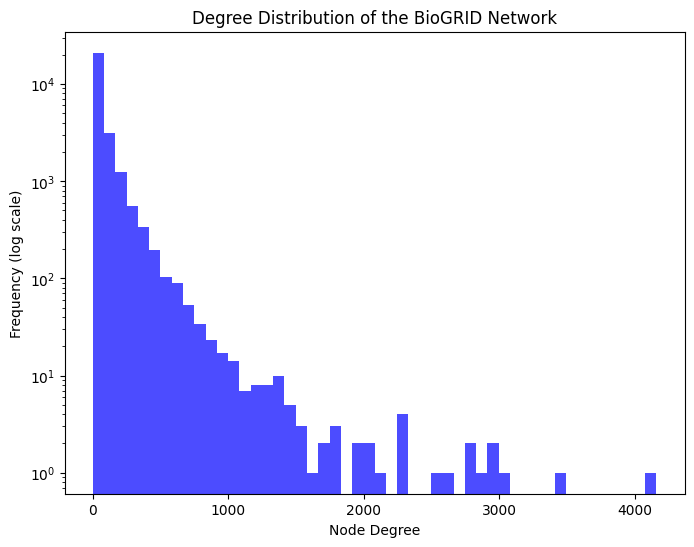

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

degrees = list(degree_dict.values())

plt.figure(figsize=(8,6))
plt.hist(degrees, bins=50, color='blue', alpha=0.7)
plt.yscale('log')  # Log scale to check scale-free property
plt.xlabel("Node Degree")
plt.ylabel("Frequency (log scale)")
plt.title("Degree Distribution of the BioGRID Network")
plt.show()


Calculating best minimal value for power law fit
Power-law alpha: 3.2188777183684416


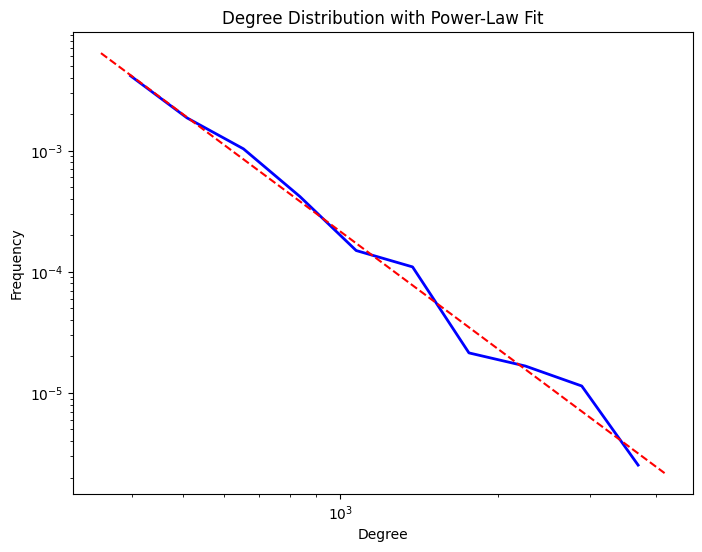

In [ ]:
!pip install powerlaw

import powerlaw

# Fit degree data to power law
fit = powerlaw.Fit(degrees)
print(f"Power-law alpha: {fit.alpha}")

# Plot PDF with power-law fit
plt.figure(figsize=(8, 6))
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution with Power-Law Fit')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Compute shortest path lengths for all node pairs
shortest_path_lengths = []

# Use Dijkstra's algorithm (better for large graphs)
lengths_dict = dict(nx.all_pairs_dijkstra_path_length(G))

# Extract all path lengths into a list
for source, targets in lengths_dict.items():
    for target, length in targets.items():
        if source != target:  # Ignore self-loops (distance = 0)
            shortest_path_lengths.append(length)

# Plot histogram of shortest path lengths
plt.hist(shortest_path_lengths, bins=20, density=True, alpha=0.6, color='b')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Shortest Path Length Distribution')
plt.show()

In [ ]:
import networkx as nx

# Compute betweenness centrality (efficiently using approximation)
betweenness = nx.betweenness_centrality(G, k=1000)  # Approximate using 1000 sample nodes
top_10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Nodes by Betweenness Centrality:")
for node, score in top_10_betweenness:
    print(f"Node {node}: {score}")

In [ ]:
# Precompute shortest paths
shortest_paths = dict(nx.all_pairs_shortest_path_length(G))

# Compute closeness manually using precomputed shortest paths
closeness = {}
for node in G.nodes():
    total_distance = sum(shortest_paths[node].values())
    closeness[node] = (len(shortest_paths[node]) - 1) / total_distance if total_distance > 0 else 0

# Get the top 10 nodes by closeness
top_10_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Nodes by Closeness Centrality:")
for node, score in top_10_closeness:
    print(f"Node {node}: {score}")
